In [ ]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn import preprocessing
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm #Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dry_Bean.csv')
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [ ]:
#Base Classifier

x = np.array(df['Area'])
x  = x.reshape(-1, 1)

label_encoder = preprocessing.LabelEncoder()
df['Class']= label_encoder.fit_transform(df['Class'])
df['Class'].unique()
y = df['Class']

#splitting data to train the model
train_x = x[:70]
train_y = y[:70]

#splitting data to test the model
test_x = x[70:]
test_y = y[70:]

dtree = DecisionTreeClassifier(random_state = 22)
dtree.fit(train_x,train_y)

DecisionTreeClassifier(random_state=22)

In [ ]:
y_pred = dtree.predict(test_x)

print("Train data accuracy:",accuracy_score(y_true = train_y, y_pred = dtree.predict(train_x)))
print("Test data accuracy:",accuracy_score(y_true = test_y, y_pred = y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.1445240381064914


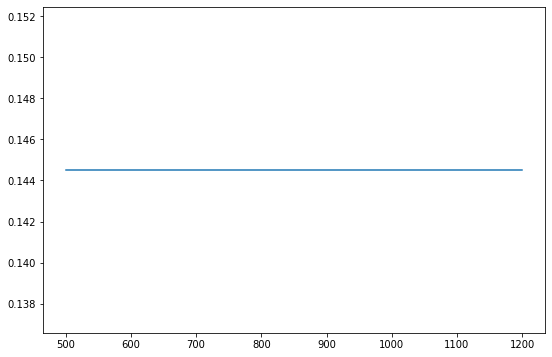

In [ ]:
#Bagging Classifier

x = np.array(df['MajorAxisLength'])
x  = x.reshape(-1, 1)

label_encoder = preprocessing.LabelEncoder()
df['Class']= label_encoder.fit_transform(df['Class'])
df['Class'].unique()
y = df['Class']

#splitting data to train the model
train_x = x[:70]
train_y = y[:70]

#splitting data to test the model
test_x = x[70:]
test_y = y[70:]

dtree = DecisionTreeClassifier(random_state = 22)
dtree.fit(train_x,train_y)

range = [500,600,700,800,900,1000,1100,1200]

models = []
scores = []

for n_estimators in range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 40)

    # Fit the model
    clf.fit(train_x, train_y)

    # Append the model and score to the list
    models.append(clf)
    scores.append(accuracy_score(y_true = test_y, y_pred = clf.predict(test_x)))

plt.figure(figsize=(9,6))
plt.plot(range, scores)
plt.show()


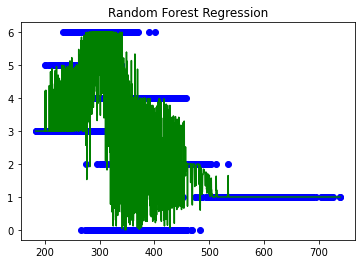

In [44]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

x = np.array(df['MajorAxisLength'])
x  = x.reshape(-1, 1)

label_encoder = preprocessing.LabelEncoder()
df['Class']= label_encoder.fit_transform(df['Class'])
df['Class'].unique()
y = df['Class']


#splitting data to train the model
train_x = x[:70]
train_y = y[:70]

#splitting data to test the model
test_x = x[70:]
test_y = y[70:]

 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x, y)  

Y_pred = regressor.predict(np.array([6.5]).reshape(1, 1)) # test the output by changing values

X_grid = np.arange(min(x), max(x), 0.09) 
                  
X_grid = X_grid.reshape((len(X_grid), 1))
  
# Scatter plot for original data
plt.scatter(x, y, color = 'blue')  

plt.plot(X_grid, regressor.predict(X_grid), 
         color = 'green') 
plt.title('Random Forest Regression')
plt.show()

In [45]:
#Gradient Booosting:Adaboost

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

SEED =1

x = np.array(df['MajorAxisLength'])
x  = x.reshape(-1, 1)

label_encoder = preprocessing.LabelEncoder()
df['Class']= label_encoder.fit_transform(df['Class'])
df['Class'].unique()
y = df['Class']

#splitting data to train the model
train_x = x[:70]
train_y = y[:70]

#splitting data to test the model
test_x = x[70:]
test_y = y[70:]

gbr = GradientBoostingRegressor(n_estimators = 200, max_depth = 1, random_state = SEED)
  
# Fit to training set
gbr.fit(train_x, train_y)
  
# Predict on test set
pred_y = gbr.predict(test_x)
  
# test set RMSE
test_rmse = MSE(test_y, pred_y) ** (1 / 2)
  
# Print rmse
print('RMSE test set: {:.2f}'.format(test_rmse))

RMSE test set: 2.35


In [53]:
# Importing the libraries
from sklearn.metrics import confusion_matrix
import xgboost as xgb

x = np.array(df['MajorAxisLength'])
x  = x.reshape(-1, 1)

label_encoder = preprocessing.LabelEncoder()
df['Class']= label_encoder.fit_transform(df['Class'])
df['Class'].unique()
y = df['Class']


#splitting data to train the model
train_x = x[:70]
train_y = y[:70]

#splitting data to test the model
test_x = x[70:]
test_y = y[70:]

# Fitting XGBoost to the training data
my_model = xgb.XGBClassifier()
my_model.fit(train_x, train_y)

# Predicting the Test set results
y_pred = my_model.predict(test_x)

# Making the Confusion Matrix
cm = confusion_matrix(test_y, y_pred)

print("Mean Absolute Error : " + str(accuracy_score(y_pred, test_y)))

Mean Absolute Error : 0.1445240381064914
